# Predicting if a person would buy life insurnace based on his age using logistic regression


### Above is a binary logistic regression problem as there are only two possible outcomes (i.e. if person buys insurance or he/she doesn't).

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv('insurance_data.csv')
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


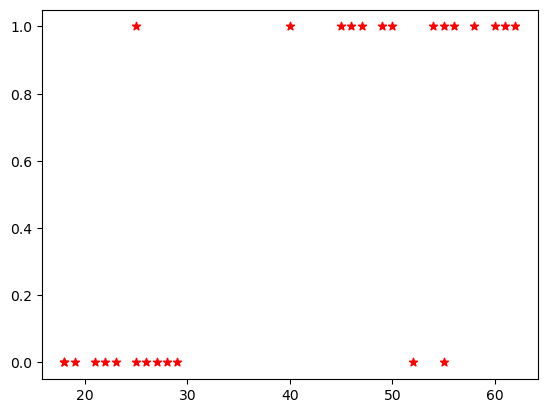

In [3]:
plt.scatter(df.age,df.bought_insurance,marker='*',color='red')

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df[['age']],df.bought_insurance,test_size=0.2)

In [5]:
x_test

,age
23,45
17,58
16,25
12,27
10,18
13,29


In [6]:
x_train

,age
11,28
5,56
9,61
18,19
4,46
22,40
8,62
2,47
3,52
21,26


In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
model=LogisticRegression()

In [9]:
model.fit(x_train,y_train)

LogisticRegression()

In [10]:
model.predict(x_test)

array([1, 1, 0, 0, 0, 0], dtype=int64)

In [11]:
model.score(x_test,y_test)

0.8333333333333334

In [12]:
model.predict_proba(x_test)

array([[0.37591411, 0.62408589],
       [0.07343222, 0.92656778],
       [0.93171748, 0.06828252],
       [0.90898841, 0.09101159],
       [0.97600171, 0.02399829],
       [0.87967067, 0.12032933]])

# Titanic data set project

## step1:collect data

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
titanic_data=pd.read_csv('titanic_train.csv')
titanic_data.head(10)



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [15]:
len(titanic_data.index)

891

## Analysing

<Axes: xlabel='Survived', ylabel='count'>

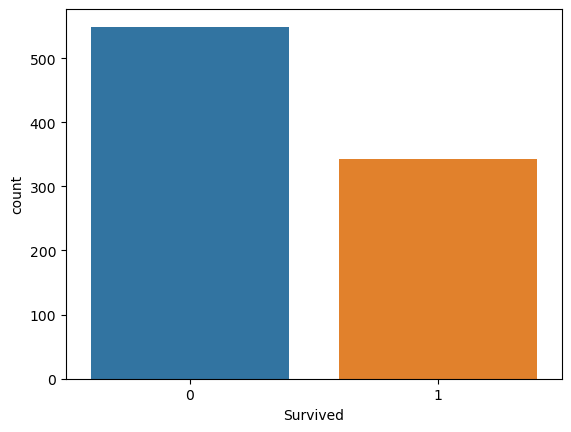

In [16]:
sns.countplot(x='Survived',data=titanic_data)

<Axes: xlabel='Survived', ylabel='count'>

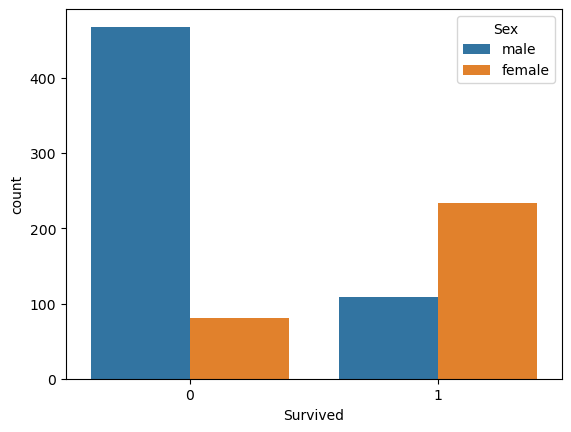

In [17]:
sns.countplot(x='Survived',hue='Sex',data=titanic_data)

<Axes: xlabel='Survived', ylabel='count'>

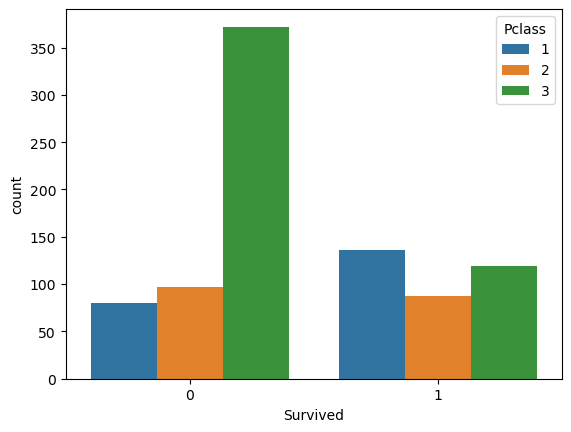

In [18]:
sns.countplot(x='Survived',hue='Pclass',data=titanic_data)

<Axes: ylabel='Frequency'>

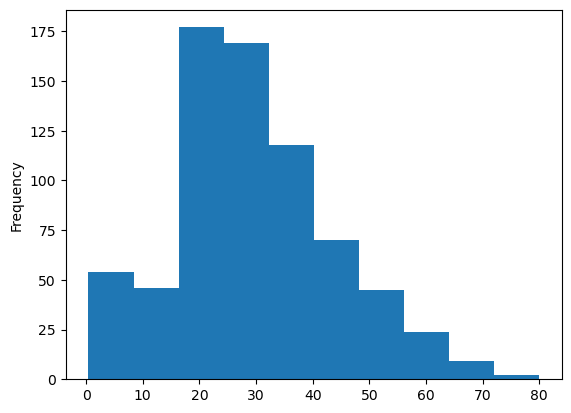

In [19]:
titanic_data["Age"].plot.hist()

<Axes: ylabel='Frequency'>

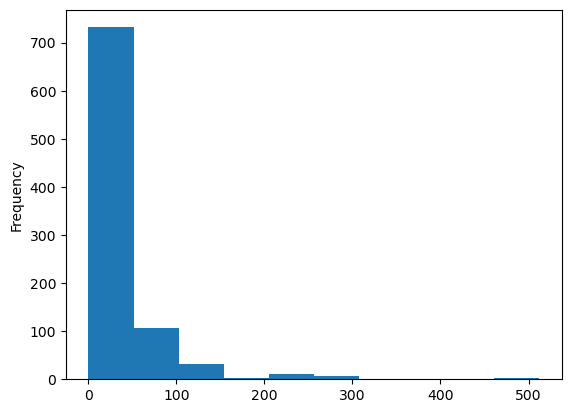

In [20]:
titanic_data["Fare"].plot.hist()

In [21]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='SibSp', ylabel='count'>

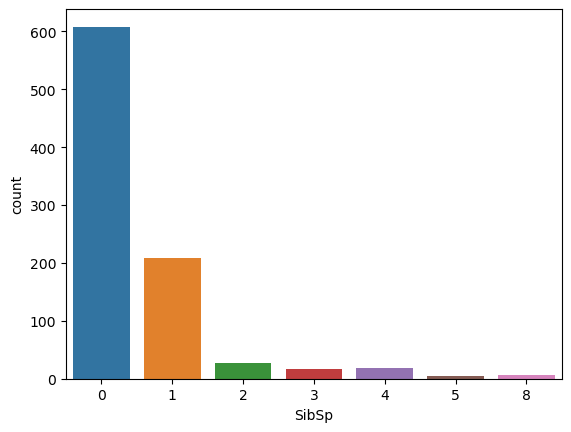

In [22]:
sns.countplot(x='SibSp',data=titanic_data)

## step 2: Datawrangling

In [23]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

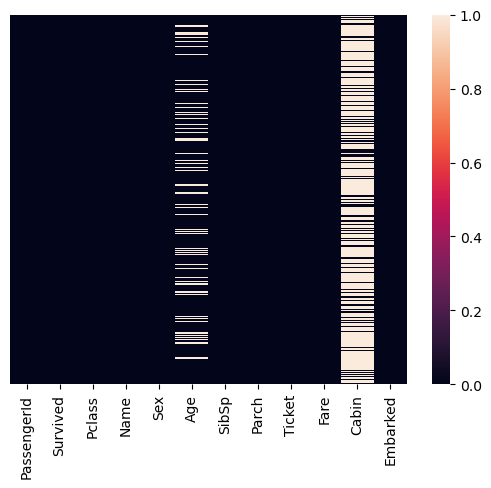

In [24]:
sns.heatmap(titanic_data.isnull(),yticklabels=False)

<Axes: xlabel='Pclass', ylabel='Age'>

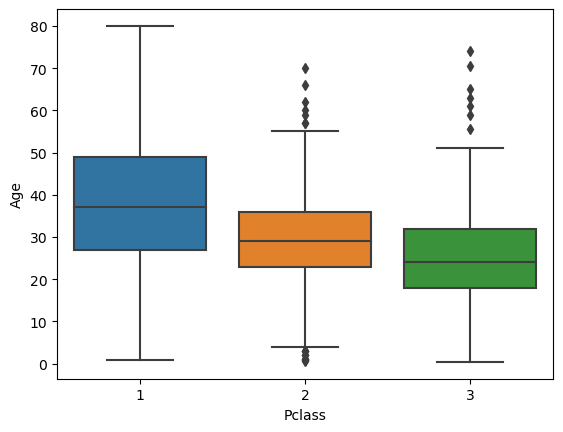

In [25]:
sns.boxplot(x='Pclass',y='Age',data=titanic_data)


## perform logistics regression

In [26]:
titanic_data.drop('Cabin',axis=1,inplace=True)

In [27]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [28]:
titanic_data.dropna(inplace=True)

<Axes: >

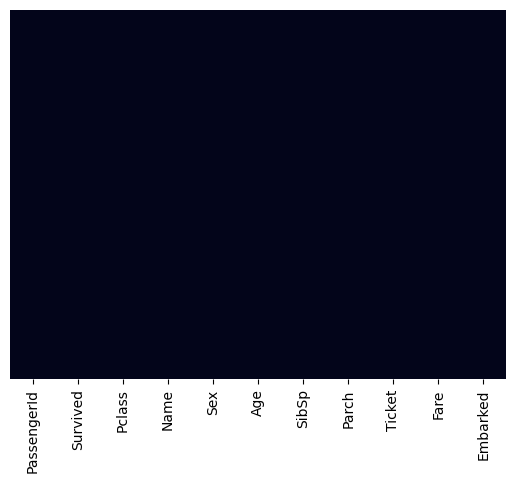

In [29]:
sns.heatmap(titanic_data.isnull(),yticklabels=False,cbar=False)

In [30]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [31]:
sex=pd.get_dummies(titanic_data['Sex'])
sex

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
885,1,0
886,0,1
887,1,0
889,0,1


In [32]:
sex=pd.get_dummies(titanic_data['Sex'],drop_first=True)

In [33]:
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
885,0
886,1
887,0
889,1


In [34]:
pcl=pd.get_dummies(titanic_data['Pclass'],drop_first=True)
pcl

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
885,0,1
886,1,0
887,0,0
889,0,0


In [35]:
embark=pd.get_dummies(titanic_data['Embarked'],drop_first=True)
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
885,1,0
886,0,1
887,0,1
889,0,0


In [36]:
titanic_data=pd.concat([titanic_data,sex,embark,pcl],axis=1)
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q,0,1,0,0,1
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1,0,1,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,0,1,0,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1,0,0,0,0


In [37]:
titanic_data.drop(['Sex','Embarked','PassengerId','Name','Ticket'],axis=1,inplace=True)




In [38]:
titanic_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,3,22.0,1,0,7.2500,1,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,1


In [39]:
titanic_data.drop('Pclass',axis=1,inplace=True)

In [49]:
titanic_data

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
885,0,39.0,0,5,29.1250,0,1,0,0,1
886,0,27.0,0,0,13.0000,1,0,1,1,0
887,1,19.0,0,0,30.0000,0,0,1,0,0
889,1,26.0,0,0,30.0000,1,0,0,0,0


## step 3:Train and Test Data:
     

In [59]:
x = titanic_data.iloc[:, 1:].values
y = titanic_data.iloc[:, 0].values

In [60]:
x

array([[22.,  1.,  0., ...,  1.,  0.,  1.],
       [38.,  1.,  0., ...,  0.,  0.,  0.],
       [26.,  0.,  0., ...,  1.,  0.,  1.],
       ...,
       [19.,  0.,  0., ...,  1.,  0.,  0.],
       [26.,  0.,  0., ...,  0.,  0.,  0.],
       [32.,  0.,  0., ...,  0.,  0.,  1.]])

In [61]:
y

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
logmodel=LogisticRegression()

In [66]:
logmodel.fit(x_train,y_train)

C:\Users\MRUTHULA SARAS P S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [67]:
predictions=logmodel.predict(x_test)

In [68]:
from sklearn.metrics import classification_report

In [69]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.80      0.81      0.81       126\n           1       0.72      0.72      0.72        88\n\n    accuracy                           0.77       214\n   macro avg       0.76      0.76      0.76       214\nweighted avg       0.77      0.77      0.77       214\n'

In [70]:
from sklearn.metrics import confusion_matrix

In [71]:
confusion_matrix(y_test,predictions)

array([[102,  24],
       [ 25,  63]], dtype=int64)

## step 4: Accuracy

In [72]:
from sklearn.metrics import accuracy_score

In [73]:
accuracy_score(y_test,predictions)

0.7710280373831776